In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd

In [3]:
import re
import string
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from sklearn import preprocessing

In [4]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [5]:
data_train = pd.read_csv('/content/drive/MyDrive/yelp_data/train.csv',header=None)

In [6]:
data_train.columns = ['deceptive','text']

In [7]:
data_train.head(5)

,deceptive,text
0,1,"Unfortunately, the frustration of being Dr. Go..."
1,2,Been going to Dr. Goldberg for over 10 years. ...
2,1,I don't know what Dr. Goldberg was like before...
3,1,I'm writing this review to give you a heads up...
4,2,All the food is great here. But the best thing...


In [8]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560000 entries, 0 to 559999
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   deceptive  560000 non-null  int64 
 1   text       560000 non-null  object
dtypes: int64(1), object(1)
memory usage: 8.5+ MB


In [9]:
from sklearn import preprocessing

In [10]:
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
data_train['deceptive']= label_encoder.fit_transform(data_train['deceptive'])

data_train['deceptive'].unique()


array([0, 1])

In [11]:
target_column = 'deceptive'

# Sample the same number of instances from each class
data_train = data_train.groupby(target_column, group_keys=False).apply(lambda x: x.sample(800))


In [12]:
#dataset description
data_train.groupby('deceptive').describe()

text                                                               
          count unique                                                top freq
deceptive                                                                     
0           800    800  I really used to love the Old Fashioned, but w...    1
1           800    800  Great drinks, and cigar selection.\n\nI went w...    1

#Deep Learning Models

## B. BiLSTM + Attention + GLoVe(100D)

In [13]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
from nltk.corpus import stopwords
from bs4 import BeautifulSoup

In [15]:
df = data_train

In [17]:
df1=df.sample(frac=1)
df1.head()

,deceptive,text
490854,1,I have used Signature West multiple times over...
260132,1,This was my first visiting a firehouse sub and...
269624,0,I heard great things about Pio Pio's rotisseri...
67864,0,9 of us met for dinner. The food was good but ...
441947,0,Sorry to all of the people who rave about this...


In [18]:
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df1['deceptive']= label_encoder.fit_transform(df1['deceptive'])

df1['deceptive'].unique()

array([1, 0])

In [19]:
df1.head()

,deceptive,text
490854,1,I have used Signature West multiple times over...
260132,1,This was my first visiting a firehouse sub and...
269624,0,I heard great things about Pio Pio's rotisseri...
67864,0,9 of us met for dinner. The food was good but ...
441947,0,Sorry to all of the people who rave about this...


In [20]:
X = df1.text
y = df1.deceptive

In [21]:
puncts = [',', '.', '"', ':', ')', '(', '-', '!', '?', '|', ';', "'", '$', '&', '/', '[', ']', '>', '%', '=', '#', '*', '+', '\\', '•',  '~', '@', '£',
 '·', '_', '{', '}', '©', '^', '®', '`',  '<', '→', '°', '€', '™', '›',  '♥', '←', '×', '§', '″', '′', 'Â', '█', '½', 'à', '…',
 '“', '★', '”', '–', '●', 'â', '►', '−', '¢', '²', '¬', '░', '¶', '↑', '±', '¿', '▾', '═', '¦', '║', '―', '¥', '▓', '—', '‹', '─',
 '▒', '：', '¼', '⊕', '▼', '▪', '†', '■', '’', '▀', '¨', '▄', '♫', '☆', 'é', '¯', '♦', '¤', '▲', 'è', '¸', '¾', 'Ã', '⋅', '‘', '∞',
 '∙', '）', '↓', '、', '│', '（', '»', '，', '♪', '╩', '╚', '³', '・', '╦', '╣', '╔', '╗', '▬', '❤', 'ï', 'Ø', '¹', '≤', '‡', '√', ]

def clean_text(x):
    x = str(x)
    for punct in puncts:
        if punct in x:
            x = x.replace(punct, f' {punct} ')
    return x

In [22]:
def clean_numbers(x):
    if bool(re.search(r'\d', x)):
        x = re.sub('[0-9]{5,}', '#####', x)
        x = re.sub('[0-9]{4}', '####', x)
        x = re.sub('[0-9]{3}', '###', x)
        x = re.sub('[0-9]{2}', '##', x)
    return x

In [23]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_data(text):
    """
        text: a string

        return: modified initial string
    """
    text = BeautifulSoup(text, "lxml").text # HTML decoding
    text = text.lower().split()
    text = " ".join(text)
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+\-=]", " ", text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"!", " ! ", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", " ^ ", text)
    text = re.sub(r"\+", " + ", text)
    text = re.sub(r"\-", " - ", text)
    text = re.sub(r"\=", " = ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r"(\d+)(k)", r"\g<1>000", text)
    text = re.sub(r":", " : ", text)
    text = re.sub(r" e g ", " eg ", text)
    text = re.sub(r" b g ", " bg ", text)
    text = re.sub(r" u s ", " american ", text)
    text = re.sub(r"\0s", "0", text)
    text = re.sub(r" 9 11 ", "911", text)
    text = re.sub(r"e - mail", "email", text)
    text = re.sub(r"j k", "jk", text)
    text = re.sub(r"\s{2,}", " ", text)

    return text

df1['text'] = df1['text'].apply(clean_data)

<ipython-input-23-705023739236>:11: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "lxml").text # HTML decoding


In [24]:
X = df1.text
y = df1.deceptive

In [25]:
X = X.map(lambda a: clean_data(a))

In [26]:
from __future__ import print_function
from keras.preprocessing.text import text_to_word_sequence
import pandas as pd
from keras.preprocessing.text import Tokenizer
import numpy as np
from bs4 import BeautifulSoup
import logging
from numpy import random
import gensim
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, MaxPooling1D, Flatten
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalMaxPooling1D, BatchNormalization
from keras.callbacks import EarlyStopping
from keras.regularizers import l2
from keras import initializers, regularizers, constraints

In [27]:
train, test, y_train, y_test = train_test_split(X,y,stratify=y,random_state=42)

In [28]:
tokenizer = Tokenizer(num_words=None,lower=True,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',split=' ',char_level=False)
tokenizer.fit_on_texts(X)
x_train = tokenizer.texts_to_sequences(train)
x_test = tokenizer.texts_to_sequences(test)
word_index = tokenizer.word_index
X = tokenizer.texts_to_sequences(X)


In [29]:
vocab_size = len(word_index)
print('Vocab size: {}'.format(vocab_size))
longest = max(len(seq) for seq in X)
print("Longest comment size: {}".format(longest))
average = np.mean([len(seq) for seq in X])
print("Average comment size: {}".format(average))
stdev = np.std([len(seq) for seq in X])
print("Stdev of comment size: {}".format(stdev))
max_len = int(average + stdev * 3)
print('Max comment size: {}'.format(max_len))

Vocab size: 12928
Longest comment size: 937
Average comment size: 135.52875
Stdev of comment size: 122.67367962785457
Max comment size: 503


In [30]:
from keras.preprocessing.sequence import pad_sequences

processed_post_x_train = pad_sequences(x_train, maxlen=max_len, padding='post', truncating='post')
processed_post_x_test = pad_sequences(x_test, maxlen=max_len, padding='post', truncating='post')

processed_x_train = pad_sequences(x_train, maxlen=max_len)
processed_x_test = pad_sequences(x_test, maxlen=max_len)

processed_pre_x_train = pad_sequences(x_train, maxlen=max_len)
processed_pre_x_test = pad_sequences(x_test, maxlen=max_len)

print('x_train shape:', processed_x_train.shape)
print('x_test shape:', processed_x_test.shape)

x_train shape: (1200, 503)
x_test shape: (400, 503)


In [31]:
from keras.layers import Layer

In [32]:
import keras.backend
from keras.models import Sequential, load_model
from keras.layers import Dense, Conv1D, MaxPooling1D
from keras.layers import Dropout, GlobalMaxPooling1D, BatchNormalization, LSTM
from keras.layers import Bidirectional
from keras.layers import Embedding
from keras.optimizers import Nadam
from keras.utils import plot_model
import matplotlib.pyplot as plt

In [34]:
embeddings_index = {}
f = open('/content/drive/MyDrive/yelp_data/glove.6B.100d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [35]:
embedding_dim = 100
k = 0
embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))

for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None and len(embedding_vector) == 100:
        # Words not found in embedding index will be all-zeros.
        k += 1
        embedding_matrix[i] = embedding_vector

In [36]:
class Attention(Layer):
    def __init__(self, step_dim,
                 W_regularizer=None, b_regularizer=None,
                 W_constraint=None, b_constraint=None,
                 bias=True, **kwargs):
        """
        Keras Layer that implements an Attention mechanism for temporal data.
        Supports Masking.
        Follows the work of Raffel et al. [https://arxiv.org/abs/1512.08756]
        # Input shape
            3D tensor with shape: `(samples, steps, features)`.
        # Output shape
            2D tensor with shape: `(samples, features)`.
        :param kwargs:
        Just put it on top of an RNN Layer (GRU/LSTM/SimpleRNN) with return_sequences=True.
        The dimensions are inferred based on the output shape of the RNN.
        Example:
            model.add(LSTM(64, return_sequences=True))
            model.add(Attention())
        """
        self.supports_masking = True
        #self.init = initializations.get('glorot_uniform')
        self.init = initializers.get('glorot_uniform')

        self.W_regularizer = regularizers.get(W_regularizer)
        self.b_regularizer = regularizers.get(b_regularizer)

        self.W_constraint = constraints.get(W_constraint)
        self.b_constraint = constraints.get(b_constraint)

        self.bias = bias
        self.step_dim = step_dim
        self.features_dim = 0
        super(Attention, self).__init__(**kwargs)

    def build(self, input_shape):
        assert len(input_shape) == 3

        self.W = self.add_weight(shape=(input_shape[-1],),
                                 initializer=self.init,
                                 name='{}_W'.format(self.name),
                                 regularizer=self.W_regularizer,
                                 constraint=self.W_constraint)
        self.features_dim = input_shape[-1]

        if self.bias:
            self.b = self.add_weight(shape=(input_shape[1],),
                                     initializer='zero',
                                     name='{}_b'.format(self.name),
                                     regularizer=self.b_regularizer,
                                     constraint=self.b_constraint)
        else:
            self.b = None

        self.built = True

    def compute_mask(self, input, input_mask=None):
        # do not pass the mask to the next layers
        return None

    def call(self, x, mask=None):
        # eij = K.dot(x, self.W) TF backend doesn't support it

        # features_dim = self.W.shape[0]
        # step_dim = x._keras_shape[1]

        features_dim = self.features_dim
        step_dim = self.step_dim

        eij = K.reshape(K.dot(K.reshape(x, (-1, features_dim)), K.reshape(self.W, (features_dim, 1))), (-1, step_dim))

        if self.bias:
            eij += self.b

        eij = K.tanh(eij)

        a = K.exp(eij)

        # apply mask after the exp. will be re-normalized next
        if mask is not None:
            # Cast the mask to floatX to avoid float64 upcasting in theano
            a *= K.cast(mask, K.floatx())

        # in some cases especially in the early stages of training the sum may be almost zero
        a /= K.cast(K.sum(a, axis=1, keepdims=True) + K.epsilon(), K.floatx())

        a = K.expand_dims(a)
        weighted_input = x * a
    #print weigthted_input.shape
        return K.sum(weighted_input, axis=1)

    def compute_output_shape(self, input_shape):
        #return input_shape[0], input_shape[-1]
        return input_shape[0],  self.features_dim



In [37]:
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, concatenate
from keras.models import Model
import keras.backend
from keras.models import Sequential, load_model
from keras.layers import Dense, Conv1D, MaxPooling1D
from keras.layers import Dropout, GlobalMaxPooling1D, BatchNormalization, LSTM
from keras.layers import Bidirectional
from keras.optimizers import Nadam
import matplotlib.pyplot as plt
from keras import backend as K


def get_model():
    review_input = Input(shape=(max_len,), dtype='int32')
    review_input_post = Input(shape=(max_len,), dtype='int32')

    x1 = Embedding(vocab_size + 1, embedding_dim, weights=[embedding_matrix], input_length=max_len, trainable=True)(review_input)
    x1 = Bidirectional(LSTM(60, return_sequences=True))(x1)
    x1 = Dropout(0.3)(x1)
    x1 = Attention(max_len)(x1)

    x2 = Embedding(vocab_size + 1, embedding_dim, weights=[embedding_matrix], input_length=max_len, trainable=True)(review_input_post)
    x2 = Bidirectional(LSTM(60, return_sequences=True))(x2)
    x2 = Dropout(0.3)(x2)
    x2 = Attention(max_len)(x2)

    x = concatenate([x1, x2])
    x = Dense(50, activation='relu')(x)
    x= Dropout(0.2)(x)
    x = BatchNormalization()(x)
    preds = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=[review_input, review_input_post], outputs=preds)

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
model = get_model()
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 503)]                0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 503)]                0         []                            
                                                                                                  
 embedding (Embedding)       (None, 503, 100)             1292900   ['input_1[0][0]']             
                                                                                                  
 embedding_1 (Embedding)     (None, 503, 100)             1292900   ['input_2[0][0]']             
                                                                                              

In [38]:
from keras.callbacks import ModelCheckpoint

# checkpoint
filepath="weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [39]:
from keras.callbacks import EarlyStopping
early_stopping_monitor = EarlyStopping(patience=10)

In [40]:
history = model.fit([processed_x_train,processed_pre_x_train],y_train, validation_data=([processed_x_test,processed_pre_x_test],y_test), epochs=15,batch_size=32,callbacks=[early_stopping_monitor],verbose=1)


Epoch 1/15
38/38 [==============================] - 26s 353ms/step - loss: 0.6194 - accuracy: 0.6667 - val_loss: 0.6706 - val_accuracy: 0.6900
Epoch 2/15
38/38 [==============================] - 11s 283ms/step - loss: 0.5005 - accuracy: 0.7667 - val_loss: 0.6111 - val_accuracy: 0.8000
Epoch 3/15
38/38 [==============================] - 10s 265ms/step - loss: 0.3250 - accuracy: 0.8817 - val_loss: 0.5376 - val_accuracy: 0.7650
Epoch 4/15
38/38 [==============================] - 9s 245ms/step - loss: 0.2532 - accuracy: 0.9075 - val_loss: 0.4071 - val_accuracy: 0.8500
Epoch 5/15
38/38 [==============================] - 10s 269ms/step - loss: 0.2337 - accuracy: 0.9142 - val_loss: 0.4485 - val_accuracy: 0.7900
Epoch 6/15
38/38 [==============================] - 9s 226ms/step - loss: 0.1511 - accuracy: 0.9467 - val_loss: 0.3729 - val_accuracy: 0.8625
Epoch 7/15
38/38 [==============================] - 8s 212ms/step - loss: 0.0762 - accuracy: 0.9783 - val_loss: 0.3575 - val_accuracy: 0.8500
Ep

In [41]:
model.evaluate([processed_x_test,processed_pre_x_test],y_test)


13/13 [==============================] - 1s 38ms/step - loss: 0.4936 - accuracy: 0.8600


[0.4935520589351654, 0.8600000143051147]

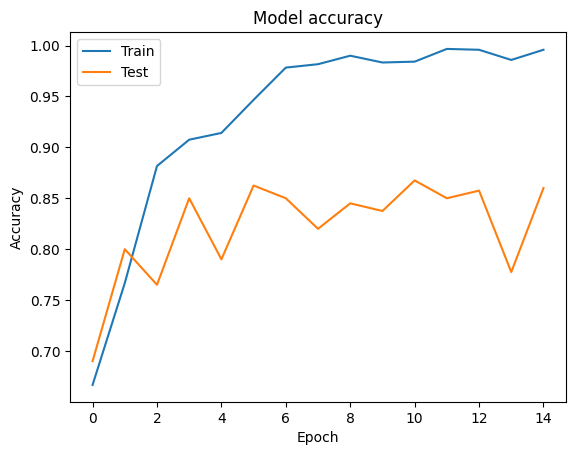

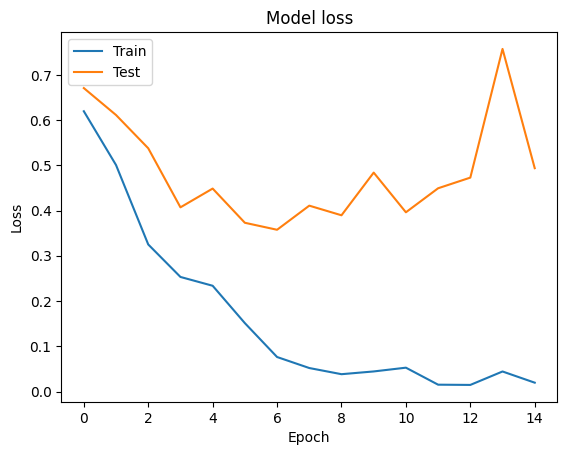

In [42]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## C. LSTM + GLoVe(100D)

In [43]:
# Initate model
model = Sequential()


model.add(Embedding(vocab_size + 1, embedding_dim, weights=[embedding_matrix], input_length=max_len, trainable=True))


model.add(LSTM(60, return_sequences=True, name='lstm_layer1'))#,kernel_regularizer=l2(0.01),recurrent_regularizer=l2(0.01)))
model.add(LSTM(30, return_sequences=True, name='lstm_layer2'))#kernel_regularizer=l2(0.01),recurrent_regularizer=l2(0.01)))
model.add(Conv1D(filters=128, kernel_size=3, padding='same', activation='relu'))#,kernel_regularizer=l2(0.01),bias_regularizer=l2(0.01)))
model.add(MaxPooling1D(3))
model.add(GlobalMaxPooling1D())
model.add(BatchNormalization())

model.add(Dense(64, activation='relu',kernel_regularizer=l2(0.17),bias_regularizer=l2(0.01)))
model.add(Dropout(0.3))
model.add(Dense(32, activation='sigmoid',kernel_regularizer=l2(0.19),bias_regularizer=l2(0.01)))
model.add(Dropout(0.3))
#model.add(Dense(16, kernel_regularizer=l2(0.001), activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 503, 100)          1292900   
                                                                 
 lstm_layer1 (LSTM)          (None, 503, 60)           38640     
                                                                 
 lstm_layer2 (LSTM)          (None, 503, 30)           10920     
                                                                 
 conv1d (Conv1D)             (None, 503, 128)          11648     
                                                                 
 max_pooling1d (MaxPooling1  (None, 167, 128)          0         
 D)                                                              
                                                                 
 global_max_pooling1d (Glob  (None, 128)               0         
 alMaxPooling1D)                                        

In [44]:
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
history = model.fit(processed_x_train,y_train,validation_data=(processed_x_test,y_test),epochs=15,batch_size=32,verbose=1)

Epoch 1/15
38/38 [==============================] - 16s 216ms/step - loss: 17.9939 - accuracy: 0.5508 - val_loss: 12.9993 - val_accuracy: 0.6375
Epoch 2/15
38/38 [==============================] - 5s 145ms/step - loss: 9.7967 - accuracy: 0.6892 - val_loss: 7.1342 - val_accuracy: 0.6575
Epoch 3/15
38/38 [==============================] - 7s 176ms/step - loss: 5.3615 - accuracy: 0.7192 - val_loss: 3.9827 - val_accuracy: 0.7450
Epoch 4/15
38/38 [==============================] - 5s 126ms/step - loss: 3.0030 - accuracy: 0.7658 - val_loss: 2.3721 - val_accuracy: 0.6900
Epoch 5/15
38/38 [==============================] - 5s 141ms/step - loss: 1.7529 - accuracy: 0.8475 - val_loss: 1.4904 - val_accuracy: 0.8200
Epoch 6/15
38/38 [==============================] - 5s 135ms/step - loss: 1.1337 - accuracy: 0.8633 - val_loss: 1.0862 - val_accuracy: 0.7950
Epoch 7/15
38/38 [==============================] - 4s 117ms/step - loss: 0.8379 - accuracy: 0.8725 - val_loss: 0.8703 - val_accuracy: 0.8050
Epo

In [45]:
model.evaluate(processed_x_test,y_test)

13/13 [==============================] - 0s 21ms/step - loss: 0.6511 - accuracy: 0.8150


[0.6510968208312988, 0.8149999976158142]

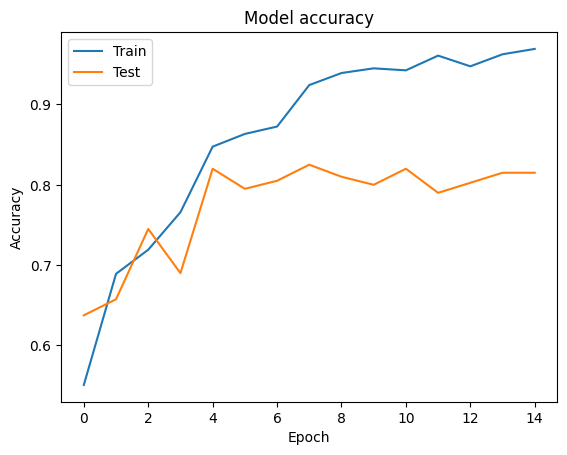

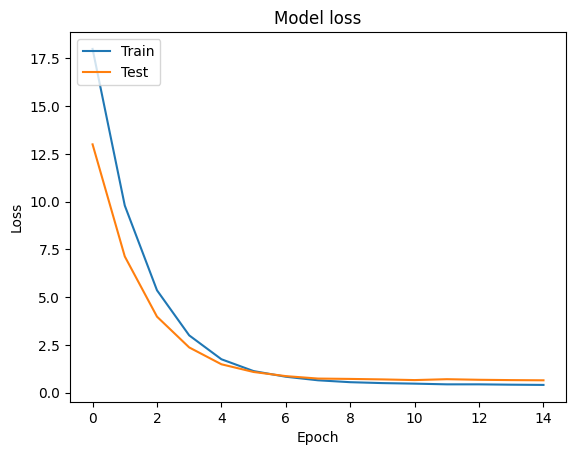

In [46]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## D. Bidirectional LSTM + GLoVe(50D)

In [48]:
embeddings_index_d = {}
f = open('/content/drive/MyDrive/yelp_data/glove.6B.50d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index_d[word] = coefs
f.close()
print('Found %s word vectors.' % len(embeddings_index_d))

Found 400000 word vectors.


In [49]:
embedding_dim = 50
k = 0
embedding_matrix_d = np.zeros((len(word_index) + 1, embedding_dim))

for word, i in word_index.items():
    embedding_vector = embeddings_index_d.get(word)
    if embedding_vector is not None and len(embedding_vector) == 50:
        # Words not found in embedding index will be all-zeros.
        k += 1
        embedding_matrix_d[i] = embedding_vector

In [50]:
# Initate model
model = Sequential()


model.add(Embedding(vocab_size + 1, embedding_dim, weights=[embedding_matrix_d], input_length=max_len, trainable=True))

model.add(Bidirectional(LSTM(50, return_sequences=True, dropout=0.1, recurrent_dropout=0.1, name='lstm_layer1')))#,kernel_regularizer=l2(0.01),recurrent_regularizer=l2(0.01)))
model.add(GlobalMaxPooling1D())
model.add(BatchNormalization())

model.add(Dense(50, activation='relu',kernel_regularizer=l2(0.17),bias_regularizer=l2(0.01)))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 503, 50)           646450    
                                                                 
 bidirectional_2 (Bidirecti  (None, 503, 100)          40400     
 onal)                                                           
                                                                 
 global_max_pooling1d_1 (Gl  (None, 100)               0         
 obalMaxPooling1D)                                               
                                                                 
 batch_normalization_2 (Bat  (None, 100)               400       
 chNormalization)                                                
                                                                 
 dense_5 (Dense)             (None, 50)                5050      
                                                      

In [51]:
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
history = model.fit(processed_x_train,y_train,validation_data=(processed_x_test,y_test),epochs=15,batch_size=128,verbose=1)

Epoch 1/15
10/10 [==============================] - 46s 4s/step - loss: 11.0646 - accuracy: 0.5192 - val_loss: 10.1106 - val_accuracy: 0.5075
Epoch 2/15
10/10 [==============================] - 35s 4s/step - loss: 9.4475 - accuracy: 0.6633 - val_loss: 8.7222 - val_accuracy: 0.5800
Epoch 3/15
10/10 [==============================] - 37s 4s/step - loss: 8.0657 - accuracy: 0.7325 - val_loss: 7.5065 - val_accuracy: 0.5550
Epoch 4/15
10/10 [==============================] - 36s 4s/step - loss: 6.8776 - accuracy: 0.7942 - val_loss: 6.4497 - val_accuracy: 0.6250
Epoch 5/15
10/10 [==============================] - 37s 4s/step - loss: 5.8577 - accuracy: 0.8167 - val_loss: 5.5398 - val_accuracy: 0.7075
Epoch 6/15
10/10 [==============================] - 36s 4s/step - loss: 4.9836 - accuracy: 0.8400 - val_loss: 4.7561 - val_accuracy: 0.7725
Epoch 7/15
10/10 [==============================] - 37s 4s/step - loss: 4.2183 - accuracy: 0.8625 - val_loss: 4.0801 - val_accuracy: 0.7750
Epoch 8/15
10/10 [

In [52]:
model.evaluate(processed_x_test,y_test)

13/13 [==============================] - 4s 344ms/step - loss: 1.2786 - accuracy: 0.8300


[1.2785935401916504, 0.8299999833106995]

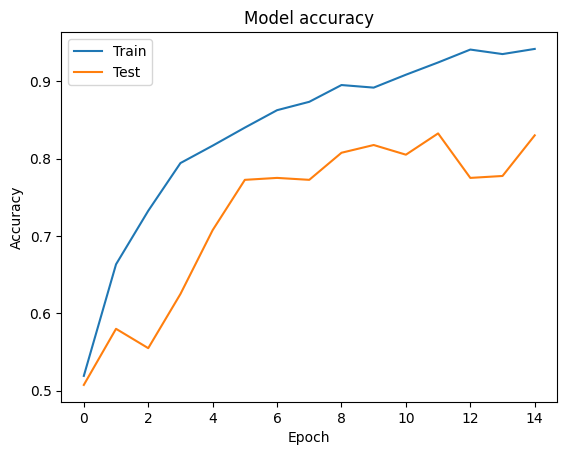

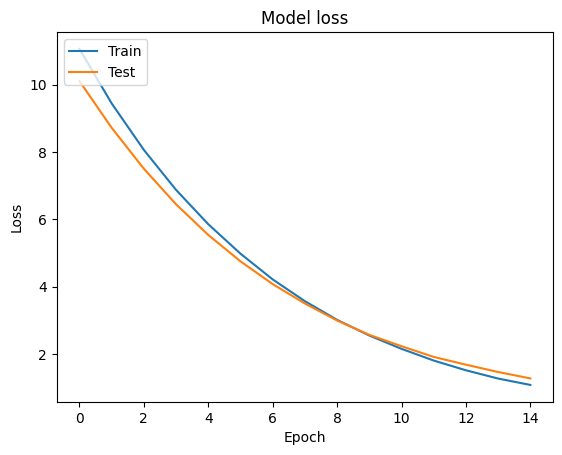

In [53]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [54]:
dl_results = {
    "Model" : ["Bidirectional LSTM + GLoVe(50D)", "LSTM + GLoVe(100D)", "CNN + LSTM + Doc2Vec +TF-IDF", "BiLSTM + Attention + GLoVe(100D)"],
    "Train accuracy" : [0.9317, 0.9667, 0.8257, 1.0000 ],
    "Test accuracy": [0.8200, 0.8100, 0.8000, 0.8600]
}

pd.DataFrame(dl_results)

,Model,Train accuracy,Test accuracy
0,Bidirectional LSTM + GLoVe(50D),0.9317,0.82
1,LSTM + GLoVe(100D),0.9667,0.81
2,CNN + LSTM + Doc2Vec +TF-IDF,0.8257,0.80
3,BiLSTM + Attention + GLoVe(100D),1.0000,0.86
